In [5]:
# Following code implements the Vicsek model in 2D from PRL 75 1226 (1995)
# For possible use in AM 115

In [6]:
# Importing packages
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Jupyter notebook magic for matplotlib
%matplotlib notebook

In [8]:
class Vicsek2D:
    def __init__(self, N, eta):
        # Initialize simulation
        self.L = 20  # length of the square 2D region to be simulated
        self.halfL = self.L / 2  # half of length (used later for PBCs)
        self.N = N  # number of particles in the 2D region
        self.rho = N/self.L**2  # density of particles in the simulation
        self.eta = eta  # noise in the system
        self.r = 1  # interaction radius
        self.rsq = self.r * self.r  # square of interaction radius
        self.dt = 1.0  # time step
        self.v = 0.03  # magnitude of velocity
        self.pos = np.random.rand(self.N, 2) * self.L  # random initial position in 2D region
        self.theta = (np.random.rand(self.N) * 2 - 1) * np.pi  # random velocity angle [-pi pi]
        self.vel = np.zeros((self.N, 2))  # initialize velocity array
        self.vel[:, 0] = self.v * np.cos(self.theta)  # velocity along x
        self.vel[:, 1] = self.v * np.sin(self.theta)  # velocity along y
        self.tt = 200  # total number of time steps
        self.rparts = np.eye(N, dtype=np.bool)  # matrix representing particles within distance r

    def main(self):
        # Setup plots
        plt.ion()
        fig = plt.figure()
        ax = fig.add_subplot(111)
        fig.show()
        fig.tight_layout()
        fig.canvas.draw()
        axrange = [0, self.L, 0, self.L]
        for nn in range(self.tt):
            ax.clear()
            ax.quiver(self.pos[:, 0], self.pos[:, 1], self.vel[:, 0], self.vel[:, 1])
            ax.axis(axrange)
            ax.set_aspect('equal', 'box')
            fig.canvas.draw()
            self.update()

    def update(self):

        # Generate the set of random movements dTheta from [-eta/2, eta/2]
        noise = (np.random.rand(self.N) - 0.5) * self.eta

        # Find particles within distance r
        self.find_particles()

        # Initialize average theta
        avg_theta = np.zeros(self.N)

        for i in range(N):

            # Angles of particles within separation r
            rtheta = self.theta[self.rparts[i, :]]
            avg_theta[i] = np.arctan2(np.mean(np.sin(rtheta)), np.mean(np.cos(rtheta)))

        # Updated angles = avg. angles + noise
        self.theta = avg_theta + noise

        # Updated velocities
        self.vel[:, 0] = self.v * np.cos(self.theta)
        self.vel[:, 1] = self.v * np.sin(self.theta)

        # Updated positions
        self.pos = self.pos + self.vel * self.dt

        # Applying periodic boundaries
        self.pos = np.mod(self.pos, self.L)

    def find_particles(self):

        # Reset rparts matrix
        self.rparts = np.eye(self.N, dtype=np.bool)

        for i in range(N):
            for j in range(i + 1, N):

                diff = self.pos[i, :] - self.pos[j, :]

                # Apply minimum image criteria for periodic boundaries on diff
                for dim in range(2):
                    while diff[dim] > self.halfL:
                        diff[dim] = diff[dim] - self.L
                    while diff[dim] < -self.halfL:
                        diff[dim] = diff[dim] + self.L

                # Separation between particles squared
                sepsq = np.dot(diff, diff)
                rflag = sepsq < self.rsq
                self.rparts[i, j] = rflag
                self.rparts[j, i] = rflag

Enter the number of particles you want in the box (try 200): 200
Enter the maximum noise in the system (try 0.2): 0.2
Box size = 20
Particle density = 0.5


<IPython.core.display.Javascript object>


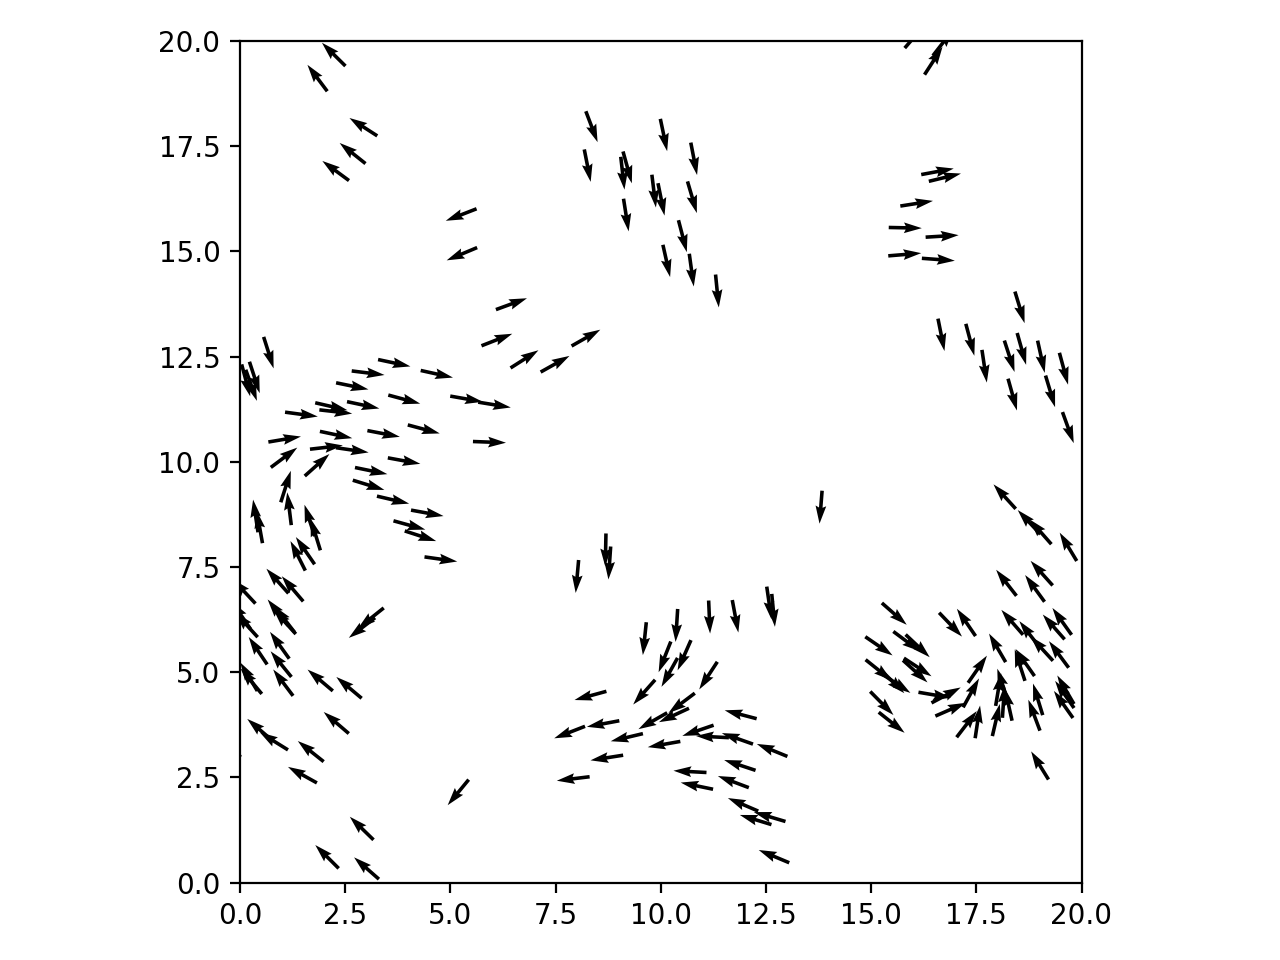

In [9]:
# Ask user for parameters
N = int(input("Enter the number of particles you want in the box (try 200): "))
eta = float(input("Enter the maximum noise in the system (try 0.2): "))
v2d = Vicsek2D(N, eta)
print("Box size =", v2d.L)
print("Particle density =", v2d.rho)
v2d.main()